In [2]:
import pandas as pd 
import numpy as np
from utils import *
import time
from scipy.stats import pearsonr, spearmanr


In [6]:
df1 = pd.read_csv("./data/CONTEST_DATA_IN_SAMPLE_1.csv",header=None)
df1.columns = ['time','stkcd','open','high','low','close','volume']
df2 = pd.read_csv("./data/CONTEST_DATA_IN_SAMPLE_2.csv",header=None)
df2.columns = ['time','stkcd','open','high','low','close','volume']
df2['time']=df2['time']+1100
df=pd.concat([df1,df2],axis=0)
df.to_csv('./data/contest_data_all.csv')

,time,stkcd,open,high,low,close,volume
0,0,1000,19.96632,19.96632,19.06278,19.18884,299216
1,0,1001,33.59400,33.59400,33.59400,33.59400,0
2,0,1002,84.11766,84.76446,81.01170,84.50574,233872
3,0,1003,5.54400,5.54400,5.27340,5.27340,19200
4,0,1004,198.46200,203.41200,195.69000,203.41200,6736
...,...,...,...,...,...,...,...
386095,1099,1346,46.26732,48.90600,46.26732,48.90600,4544
386096,1099,1347,68.50140,69.43200,68.50140,69.43200,2400
386097,1099,1348,238.55700,241.23660,238.26000,238.49100,6800
386098,1099,1349,139.30620,141.66240,139.30620,141.17400,2288


In [6]:
df=pd.read_csv('./data/contest_data_all.csv',index_col=0)
df

,time,stkcd,open,high,low,close,volume
0,0,1000,19.96632,19.96632,19.06278,19.18884,299216
1,0,1001,33.59400,33.59400,33.59400,33.59400,0
2,0,1002,84.11766,84.76446,81.01170,84.50574,233872
3,0,1003,5.54400,5.54400,5.27340,5.27340,19200
4,0,1004,198.46200,203.41200,195.69000,203.41200,6736
...,...,...,...,...,...,...,...
280795,1899,1346,12.71160,12.71160,12.71160,12.71160,0
280796,1899,1347,141.97920,141.97920,141.97920,141.97920,0
280797,1899,1348,411.10740,412.20960,403.70880,410.17680,9200
280798,1899,1349,149.75400,149.75400,145.44420,145.44420,0


In [17]:
days=df['time'].unique()
stocks=df['stkcd'].unique()

In [7]:
close_df = pd.DataFrame()
high_df = pd.DataFrame()
low_df = pd.DataFrame()
volume_df = pd.DataFrame()
for sub_df in df.groupby('stkcd'):
    close_df[sub_df[0]] = sub_df[1].reset_index().close
    high_df[sub_df[0]] = sub_df[1].reset_index().high
    low_df[sub_df[0]] = sub_df[1].reset_index().low
    volume_df[sub_df[0]] = sub_df[1].reset_index().volume
highs = high_df.values
lows = low_df.values
closes = close_df.values
volumes = volume_df.values

horizon = 1
rts = close_df.pct_change(horizon).shift(-horizon-1).values # returns

In [36]:
print(closes.shape,rts.shape,avgs.shape)

(1900, 351) (1900, 351) (1900, 351)


In [8]:
avgs = np.empty((0,closes.shape[1]))
moms = np.empty((0,closes.shape[1]))
vols = np.empty((0,closes.shape[1]))
max52s = np.empty((0,closes.shape[1]))
min52s = np.empty((0,closes.shape[1]))
ccis = np.empty((0,closes.shape[1]))
Ks = np.empty((0,closes.shape[1]))
Ds = np.empty((0,closes.shape[1]))
Js = np.empty((0,closes.shape[1]))
rsis = np.empty((0,closes.shape[1]))
trixs = np.empty((0,closes.shape[1]))
willrs = np.empty((0,closes.shape[1]))
macds = np.empty((0,closes.shape[1]))
natrs = np.empty((0,closes.shape[1]))
mfis = np.empty((0,closes.shape[1]))
start = time.time()
for i in range(1,len(closes)+1):
    c = closes[:i]
    h = highs[:i]
    l = lows[:i]
    v = volumes[:i]
    avg=get_avg(c,3)
    mom=get_mom(c,5)
    vol=get_vol(c,5)
    max52=get_52weekhigh(c)
    min52=get_52weeklow(c)
    cci = get_cci(h,l,c)
    K,D,J = get_kdj(h,l,c)
    rsi = get_rsi(c)
    trix = get_trix(c)
    willr = get_willr(h,l,c)
    macd = get_macd(c)
    natr = get_natr(h,l,c)
    mfi = get_mfi(c,h,l,v)

    avgs=np.vstack([avgs,avg])
    moms=np.vstack([moms,mom])
    vols=np.vstack([vols,vol])
    max52s=np.vstack([max52s,max52])
    min52s=np.vstack([min52s,min52])
    ccis=np.vstack([ccis,cci])
    Ks=np.vstack([Ks,K])
    Ds=np.vstack([Ds,D])
    Js=np.vstack([Js,J])
    rsis=np.vstack([rsis,rsi])
    trixs=np.vstack([trixs,trix])
    willrs=np.vstack([willrs,willr])
    macds=np.vstack([macds,macd])
    natrs=np.vstack([natrs,natr])
    mfis=np.vstack([mfis,mfi])
    if i%100 == 0:
        print(i)
endtime = time.time()
# print((start-endtime)*1000 / 1900)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [38]:
factors=pd.DataFrame()
factors['avgs']=pd.DataFrame(avgs,columns=stocks).stack()
factors['moms']=pd.DataFrame(moms,columns=stocks).stack()
factors['vols']=pd.DataFrame(vols,columns=stocks).stack()
factors['max52s']=pd.DataFrame(max52s,columns=stocks).stack()
factors['min52s']=pd.DataFrame(min52s,columns=stocks).stack()
factors['ccis']=pd.DataFrame(ccis,columns=stocks).stack()
factors['Ks']=pd.DataFrame(Ks,columns=stocks).stack()
factors['Ds']=pd.DataFrame(Ds,columns=stocks).stack()
factors['Js']=pd.DataFrame(Js,columns=stocks).stack()
factors['rsis']=pd.DataFrame(rsis,columns=stocks).stack()
factors['trixs']=pd.DataFrame(trixs,columns=stocks).stack()
factors['willrs']=pd.DataFrame(willrs,columns=stocks).stack()
factors['macds']=pd.DataFrame(macds,columns=stocks).stack()
factors['natrs']=pd.DataFrame(natrs,columns=stocks).stack()
factors['mfis']=pd.DataFrame(mfis,columns=stocks).stack()

factors['closes']=pd.DataFrame(closes,columns=stocks).stack()
factors['rts']=pd.DataFrame(rts,columns=stocks).stack()

factors.index=factors.index.set_names(['date','asset'])
factors

avgs      moms      vols    max52s    min52s        ccis  \
date asset                                                                 
0    1000     0.0000  0.000000  0.000000  0.000000  0.000000    0.000000   
     1001     0.0000  0.000000  0.000000  0.000000  0.000000    0.000000   
     1002     0.0000  0.000000  0.000000  0.000000  0.000000    0.000000   
     1003     0.0000  0.000000  0.000000  0.000000  0.000000    0.000000   
     1004     0.0000  0.000000  0.000000  0.000000  0.000000    0.000000   
...              ...       ...       ...       ...       ...         ...   
1899 1346    12.6500  0.997068  0.017432 -0.472039  0.139645   13.579067   
     1347   143.2442  0.998287  0.018120 -0.027003  0.195111   22.409361   
     1348   407.6996  1.001224  0.013452 -0.095555  0.162101 -122.489152   
     1349   147.6794  0.988371  0.022686 -0.316322  0.303733 -465.203520   
     1350   886.2480  0.980110  0.024560 -0.135262  0.987595  485.754924   

                   Ks         Ds          Js       rsis     trixs     willrs  \
date asset                                                                     
0    1000    0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
     1001    0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
     1002    0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
     1003    0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
     1004    0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
...               ...        ...         ...        ...       ...        ...   
1899 1346   15.661939  35.423964   74.948016  47.312634 -0.451021  66.304348   
     1347   62.130479  60.983690   58.690112  42.532678  0.298771  49.495677   
     1348   58.353317  68.083986   87.545322  34.675327 -0.130823  28.946617   
     1349   11.258278  36.058209   85.658070  52.841605  0.058355  68.069498   
     1350    8.686660  40.352166  103.683178  47.436163 -0.012719  88.077859   

               macds     natrs       mfis     closes       rts  
date asset                                                      
0    1000   0.000000  0.000000   0.000000   19.18884  0.051014  
     1001   0.000000  0.000000   0.000000   33.59400  0.025743  
     1002   0.000000  0.000000   0.000000   84.50574  0.155893  
     1003   0.000000  0.000000   0.000000    5.27340 -0.061343  
     1004   0.000000  0.000000   0.000000  203.41200  0.048531  
...              ...       ...        ...        ...       ...  
1899 1346  -0.266959  0.034960  44.564064   12.71160       NaN  
     1347   1.873541  0.015116  69.398598  141.97920       NaN  
     1348  -0.188341  0.015664  56.336668  410.17680       NaN  
     1349   0.356781  0.026589  63.487425  145.44420       NaN  
     1350  -7.899538  0.037310  41.022060  848.10000       NaN  

[666900 rows x 17 columns]

In [39]:
factors.to_csv('./data/factors_all.csv')

In [52]:

import numpy as np
import pandas as pd

import lightgbm as lgb


#from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import mean_squared_error

# from sklearn.model_selection import StratifiedKFold, KFold
# from sklearn.model_selection import train_test_split
#from sklearn.metrics import f1_score,precision_recall_fscore_support,roc_curve,auc,roc_auc_score
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import gc

In [95]:
factors=pd.read_csv('./data/factors_all.csv',index_col=[0,1])
factors=factors.loc[15:1890]
factors

avgs      moms      vols    max52s    min52s         ccis  \
date asset                                                                   
15   1000    22.52338  0.996323  0.026261 -0.088591  0.182913     0.000000   
     1001    30.82200  0.996600  0.041475 -0.114286  0.004320     0.000000   
     1002    92.55114  1.008764  0.028206 -0.032895  0.125579     0.000000   
     1003     8.62400  1.021903  0.082617 -0.020000  0.839800     0.000000   
     1004   228.47000  1.007697  0.027663 -0.035393  0.133707     0.000000   
...               ...       ...       ...       ...       ...          ...   
1890 1346    12.67860  0.982520  0.052960 -0.476974  0.128994  1031.520318   
     1347   139.57900  1.004897  0.011010 -0.026550  0.195667   190.432770   
     1348   403.90240  0.999241  0.018051 -0.121213  0.129135    56.759977   
     1349   149.23700  1.005942  0.022422 -0.305805  0.323789   207.931970   
     1350   930.57800  1.002619  0.038869 -0.055855  1.205975    31.101540   

                   Ks         Ds          Js       rsis     trixs     willrs  \
date asset                                                                     
15   1000   14.199378  28.864494   58.194727  65.543951  0.000000  58.006221   
     1001   16.729245  26.927177   47.323043  46.159797  0.000000  90.410959   
     1002   72.261056  64.348112   48.522223  56.024132  0.000000  29.765632   
     1003   44.023569  37.853102   25.512169  64.693810  0.000000   4.354136   
     1004   77.523583  87.284746  106.807072  61.936902  0.000000  21.724138   
...               ...        ...         ...        ...       ...        ...   
1890 1346   12.128583   7.863951   -0.665311  66.074649 -0.208574  90.658174   
     1347   68.815329  59.913896   42.111029  50.191795  0.287679   0.000000   
     1348   47.763721  40.804162   26.885042  42.818377 -0.111485  87.887888   
     1349   72.856495  57.069547   25.495650  53.342867  0.114607  62.362815   
     1350   65.412108  58.064673   43.369803  50.680995  0.274465  37.636761   

               macds     natrs        mfis     closes       rts  
date asset                                                       
15   1000   0.000000  0.000000   71.913040   22.69872  0.027948  
     1001   0.000000  0.000000   37.688247   30.69000  0.034409  
     1002   0.000000  0.000000   64.798969   95.11788  0.011883  
     1003   0.000000  0.000000   85.322522    9.70200 -0.020979  
     1004   0.000000  0.000000   83.841268  226.64400 -0.016444  
...              ...       ...         ...        ...       ...  
1890 1346  -0.254516  0.037631   49.595572   12.59280  0.040000  
     1347   1.678648  0.018361  100.000000  142.04520  0.014900  
     1348  -5.897430  0.018846   71.101234  398.54100 -0.017089  
     1349  -0.543493  0.028474   30.416430  147.68160 -0.008999  
     1350   6.157052  0.033052   36.990171  925.98000  0.005273  

[658476 rows x 17 columns]

In [246]:
start_day=15
split_day=1000
end_day=1890

train_data=factors.loc[start_day:split_day]
test_data=factors.loc[split_day+1:end_day]



X_train=train_data.drop(columns=['closes','rts'])
X_test=test_data.drop(columns=['closes','rts'])

y_train=train_data['rts']
y_test=test_data['rts']


In [352]:
model = lgb.LGBMRegressor(objective='regression', num_leaves=32, 
                    learning_rate=0.04, n_estimators=50,
                    max_depth=5,
                    subsample=0.87,
                    colsample_bytree=0.88,
                    random_state=2020
                    )

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse', early_stopping_rounds=10)
#model.fit(X_train, y_train, eval_metric='rmse')

[1]	valid_0's rmse: 0.0236164	valid_0's l2: 0.000557732
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 0.0236159	valid_0's l2: 0.000557711
[3]	valid_0's rmse: 0.0236154	valid_0's l2: 0.000557686
[4]	valid_0's rmse: 0.0236148	valid_0's l2: 0.000557659
[5]	valid_0's rmse: 0.0236147	valid_0's l2: 0.000557654
[6]	valid_0's rmse: 0.0236147	valid_0's l2: 0.000557654
[7]	valid_0's rmse: 0.0236145	valid_0's l2: 0.000557644
[8]	valid_0's rmse: 0.0236143	valid_0's l2: 0.000557633
[9]	valid_0's rmse: 0.0236146	valid_0's l2: 0.000557651
[10]	valid_0's rmse: 0.0236145	valid_0's l2: 0.000557645
[11]	valid_0's rmse: 0.0236146	valid_0's l2: 0.000557649
[12]	valid_0's rmse: 0.0236144	valid_0's l2: 0.000557638
[13]	valid_0's rmse: 0.0236142	valid_0's l2: 0.000557631
[14]	valid_0's rmse: 0.0236142	valid_0's l2: 0.000557628
[15]	valid_0's rmse: 0.0236144	valid_0's l2: 0.000557639
[16]	valid_0's rmse: 0.0236146	valid_0's l2: 0.000557651
[17]	valid_0's rmse: 0.0236144	valid

LGBMRegressor(colsample_bytree=0.88, learning_rate=0.04, max_depth=5,
              n_estimators=50, num_leaves=32, objective='regression',
              random_state=2020, subsample=0.87)

In [357]:
import joblib
joblib.dump(model, 'lgb_model.pkl')
#model = joblib.load('lgb_model.pkl')

['lgb_model.pkl']

In [353]:

#测试集
test_lst=[]
for this_date in range(split_day+1,end_day):
    #print(this_date)
    pred=pd.Series(model.predict(X_test.loc[this_date]),index=stocks)
    head = pred.nlargest(10).index.tolist()
    tail = pred.nsmallest(10).index.tolist()
    pred=pd.Series(0,index=stocks,name=this_date)
    pred[head]=1/(len(head)+len(tail))
    pred[tail]=-1/(len(head)+len(tail))
    test_lst.append(pred)
test_pred_df=pd.concat(test_lst,axis=1).stack()
test_pred_df=pd.DataFrame(test_pred_df,columns=['weight'])
test_pred_df.index=test_pred_df.index.swaplevel()
test_pred_df.index=test_pred_df.index.set_names(['date','asset'])

test_pred_df
# y_pred = model.predict(X_test)#, num_iteration=gbm.best_iteration_)
# # 模型评估
# print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# # 特征重要度
# print('Feature importances:', list(model.feature_importances_))

,,weight
date,asset,
1001,1000,0.05
1002,1000,0.00
1003,1000,0.00
1004,1000,0.00
1005,1000,0.00
...,...,...
1885,1350,0.00
1886,1350,0.00
1887,1350,0.00


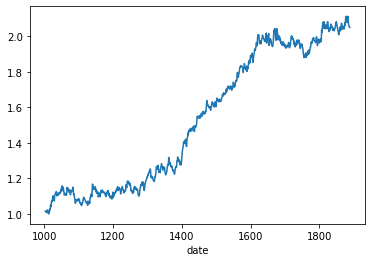

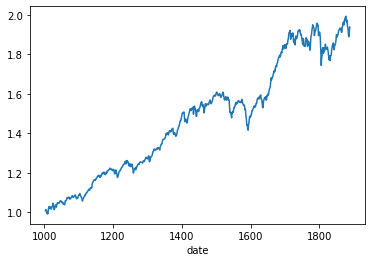

In [354]:
# dict_keys(['Performance', 'Assess', 'BullAssess', 'BearAssess', 'baseinfor'])
from stock_assess import backtest
price=test_data['closes'].reset_index()
price.columns=['date','asset','adjclose']
weight=test_pred_df['weight'].reset_index()

result=backtest(weight,price,bench_code='000905.SH')
#PtfRet	BenchRet	turnover	AbRet	NetValue	PtfNetValue	BenchNetValue	MaxDrawDown
result['Performance']['PtfNetValue'].plot()
plt.show()
result['Performance']['BenchNetValue'].plot()
plt.show()

In [347]:
#训练集
train_lst=[]
for this_date in range(start_day+1,split_day):
    #print(this_date)
    pred=pd.Series(model.predict(X_train.loc[this_date]),index=stocks)
    head = pred.nlargest(10).index.tolist()
    tail = pred.nsmallest(10).index.tolist()
    pred=pd.Series(0,index=stocks,name=this_date)
    pred[head]=1/(len(head)+len(tail))
    pred[tail]=-1/(len(head)+len(tail))
    train_lst.append(pred)
train_pred_df=pd.concat(train_lst,axis=1).stack()
train_pred_df=pd.DataFrame(train_pred_df,columns=['weight'])
train_pred_df.index=train_pred_df.index.swaplevel()
train_pred_df.index=train_pred_df.index.set_names(['date','asset'])

#train_pred_df['close']=test_data['closes']
train_pred_df
# y_pred = model.predict(X_test)#, num_iteration=gbm.best_iteration_)
# # 模型评估
# print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# # 特征重要度
# print('Feature importances:', list(model.feature_importances_))

,,weight
date,asset,
16,1000,0.0
17,1000,0.0
18,1000,0.0
19,1000,0.0
20,1000,0.0
...,...,...
995,1350,0.0
996,1350,0.0
997,1350,0.0


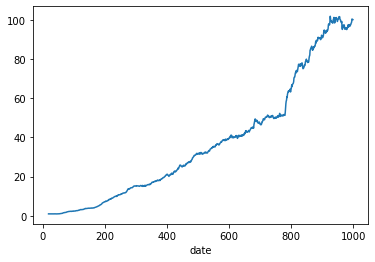

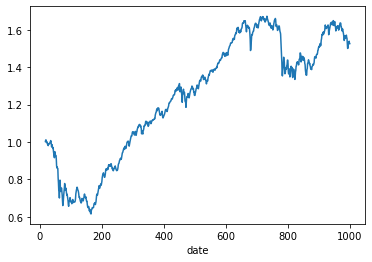

In [348]:
# dict_keys(['Performance', 'Assess', 'BullAssess', 'BearAssess', 'baseinfor'])
from stock_assess import backtest
price=train_data['closes'].reset_index()
price.columns=['date','asset','adjclose']
weight=train_pred_df['weight'].reset_index()

result=backtest(weight,price,bench_code='000905.SH')
#PtfRet	BenchRet	turnover	AbRet	NetValue	PtfNetValue	BenchNetValue	MaxDrawDown
result['Performance']['PtfNetValue'].plot()
plt.show()
result['Performance']['BenchNetValue'].plot()
plt.show()

In [280]:
display(result['Assess'])
display(result['BullAssess'])
display(result['BearAssess'])

Annualized Returns                        1.56751
PtfNetValueRatio                          67.2307
BenchNetValueRatio                        1.52167
NetValueDiff                               65.709
Max Drawdown                             0.112479
Sharpe Ratio                              4.13707
Volatility                               0.234896
Turnover                                 0.491446
WinRate                                  0.606925
Calmar Ratio                              13.9361
ProfitLoss Ratio                          2.13775
Downside Risk                            0.112846
Sortino Ratio(risk-free rate=0.010)       13.8021
HighAbRetRate(AbRet>0.030)              0.0386965
LowAbRetRate(AbRet<-0.030)             0.00407332
Time periods                            18 to 999
Time length                                   982
dtype: object

Annualized Returns                      -0.298842
PtfNetValueRatio                           67.407
BenchNetValueRatio                        1.53524
NetValueDiff                              65.8717
Max Drawdown                             0.112479
Sharpe Ratio                             -1.87707
Volatility                               0.180346
Turnover                                 0.495088
WinRate                                  0.464912
Calmar Ratio                             -2.65687
ProfitLoss Ratio                         0.731624
Downside Risk                            0.118523
Sortino Ratio(risk-free rate=0.010)      -2.60575
HighAbRetRate(AbRet>0.030)              0.0105263
LowAbRetRate(AbRet<-0.030)             0.00701754
Time periods                            18 to 997
Time length                                   570
dtype: object

Annualized Returns                       14.4662
PtfNetValueRatio                         66.2242
BenchNetValueRatio                       1.52774
NetValueDiff                             64.6964
Max Drawdown                               0.101
Sharpe Ratio                             10.9942
Volatility                              0.253276
Turnover                                0.486408
WinRate                                 0.803398
Calmar Ratio                              143.23
ProfitLoss Ratio                         10.5786
Downside Risk                          0.0738292
Sortino Ratio(risk-free rate=0.010)      195.806
HighAbRetRate(AbRet>0.030)             0.0776699
LowAbRetRate(AbRet<-0.030)                     0
Time periods                           21 to 999
Time length                                  412
dtype: object